### Simple pandas example

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mplt
from matplotlib import pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.DataFrame([["Apple", 10], ["Mango", 20], ["Orange", 10]], columns=['Fruit', 'Quantity'])

In [3]:
df.head(5)

,Fruit,Quantity
0,Apple,10
1,Mango,20
2,Orange,10


In [4]:
# total available fruits
df['Quantity'].sum()

40

In [5]:
# count of each quantity
df.Quantity.value_counts()

10    2
20    1
Name: Quantity, dtype: int64

In [6]:
df.Quantity.max()

20

### Readind data from csv file

In [7]:
df = pd.read_csv('data/iris_missing.csv')

In [8]:
df.index

RangeIndex(start=0, stop=150, step=1)

In [9]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'], dtype='object')

In [10]:
# first five rows
df.head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,NaN,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
# last five rows
df.tail(5)

,sepal_length,sepal_width,petal_length,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [12]:
# unique values of class
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', nan, 'Iris-virginica'], dtype=object)

In [13]:
# value count for each class
df['class'].value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    49
Name: class, dtype: int64

In [14]:
# sort on single column
df.sort_values(by = 'sepal_length').head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
13,4.3,3.0,1.1,0.1,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
42,4.4,NaN,1.3,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
29,4.7,3.2,1.6,0.2,Iris-setosa


In [15]:
# sort on multiple columns
df.sort_values(by = ["sepal_length", "sepal_width"]).head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
13,4.3,3.0,1.1,0.1,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
38,4.4,3.0,1.3,0.2,Iris-setosa
42,4.4,NaN,1.3,0.2,Iris-setosa
41,4.5,2.3,1.3,0.3,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
47,4.6,3.2,1.4,0.2,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
22,4.6,3.6,1.0,0.2,Iris-setosa
2,4.7,3.2,NaN,0.2,Iris-setosa


### Queries (SQL – Pandas)

In [16]:
# Projection
# SELECT sepal_length, class FROM iris_data LIMIT 5;
df[['sepal_length', 'class']].head(5)

,sepal_length,class
0,5.1,Iris-setosa
1,4.9,Iris-setosa
2,4.7,Iris-setosa
3,4.6,Iris-setosa
4,5.0,Iris-setosa


In [17]:
# SELECT sepal_length, class FROM iris_data WHERE sepal_length >= 5.0 LIMIT 5;
df[df['sepal_length'] >= 5.0][['sepal_length', 'class']].head(5)

,sepal_length,class
0,5.1,Iris-setosa
4,5.0,Iris-setosa
5,5.4,Iris-setosa
7,5.0,Iris-setosa
10,5.4,Iris-setosa


In [18]:
# Multiple Condition
# SELECT sepal_length, sepal_width, class FROM iris_data WHERE sepal_length >= 5.0 AND sepal_width <= 5.0 LIMIT 5;
df[(df['sepal_length'] >= 5.0) & (df['sepal_width'] <= 5.0)][['sepal_length', 'sepal_width', 'class']].head(5)

,sepal_length,sepal_width,class
0,5.1,3.5,Iris-setosa
4,5.0,3.6,Iris-setosa
5,5.4,3.9,Iris-setosa
7,5.0,3.4,Iris-setosa
10,5.4,3.7,Iris-setosa


In [19]:
# Condition to test null
df[~df['class'].notnull()].head(5)

,sepal_length,sepal_width,petal_length,petal_width,class
65,6.7,3.1,4.4,1.4,NaN


In [20]:
# Group by
# SELECT count(*), class FROM iris_data GROUP BY class;
df.groupby('class').size()

class
Iris-setosa        50
Iris-versicolor    49
Iris-virginica     50
dtype: int64

In [21]:
df.groupby('class').count()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,49,48,49,48
Iris-versicolor,49,49,48,49
Iris-virginica,49,49,49,48


In [22]:
# SELECT avg(sepal_length), class FROM iris_data GROUP BY class;
df.groupby('class').agg({'sepal_length' : np.mean})

,sepal_length
class,
Iris-setosa,5.010204
Iris-versicolor,5.920408
Iris-virginica,6.593878


## Graphs

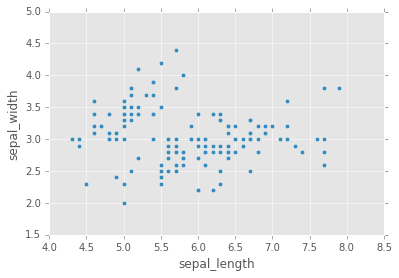

In [23]:
df.plot.scatter(x = 'sepal_length', y = 'sepal_width')

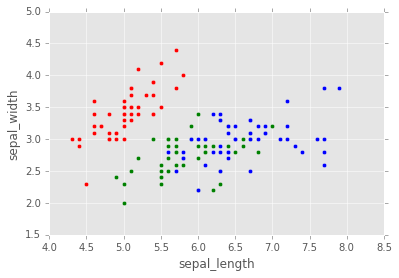

In [24]:
axis = df[df['class'] == 'Iris-setosa'].plot.scatter(x = 'sepal_length', y='sepal_width', color='red')
axis = df[df['class'] == 'Iris-versicolor'].plot.scatter(x = 'sepal_length', y='sepal_width', color='green', ax=axis)
df[df['class'] == 'Iris-virginica'].plot.scatter(x = 'sepal_length', y='sepal_width', color='blue', ax=axis)

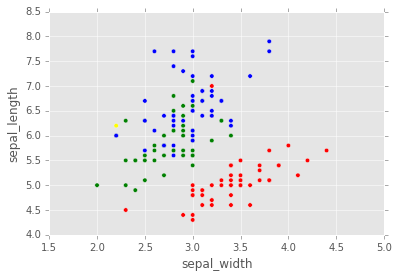

In [25]:
clr = {'Iris-setosa' : 'red', 'Iris-versicolor' : 'green', 'Iris-virginica' : 'blue'}
df.plot.scatter(x='sepal_width', y='sepal_length', c=df['class'].apply(lambda x: clr[x] if x in clr else 'yellow'))

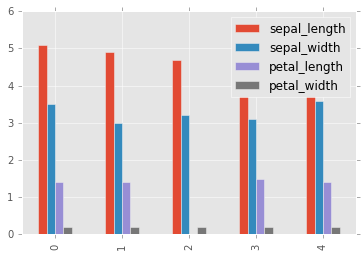

In [26]:
df.head(5).plot.bar()

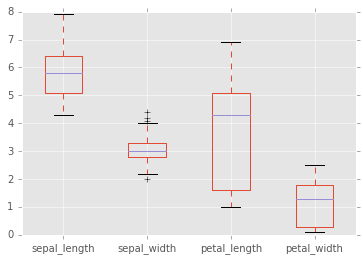

In [27]:
df.plot.box()

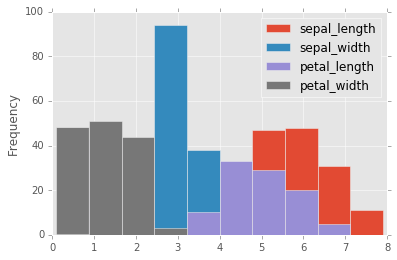

In [28]:
df.plot.hist()

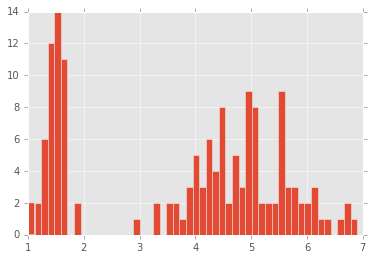

In [29]:
df['petal_length'].hist(bins=50)

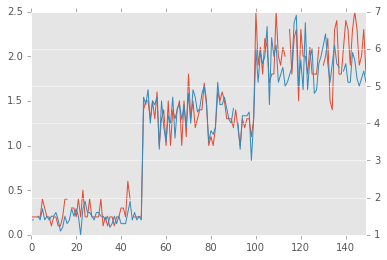

In [30]:
# Line plot with multiple Y axis
axis = df['petal_width'].plot.line()
df['petal_length'].plot.line(secondary_y = True, ax=axis)

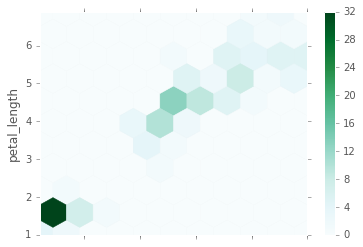

In [31]:
# hexbin plot
df.plot.hexbin(x='petal_width', y='petal_length', reduce_C_function=np.size, gridsize=10)

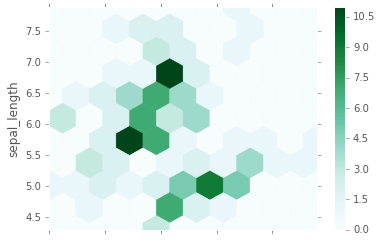

In [32]:
df.plot.hexbin(x='sepal_width', y='sepal_length', reduce_C_function=np.size, gridsize=10)

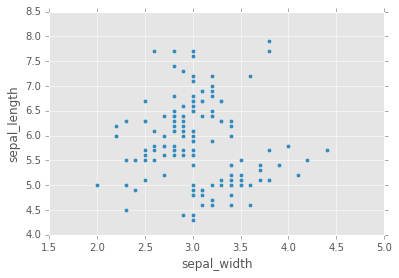

In [33]:
df.plot.scatter(x='sepal_width', y='sepal_length')